# RECHAUFFEMENT CLIMATIQUE

## Debut et introduction 

Depuis quelques années, la prise de conscience de la protection de la planete s'est généralisée. On entend souvent le sujet du rechauffement climatique et les emissions de CO2.
On veut donc savoir si a-t-il un impact significatif.

Nous avons analysé nos principales problématiques:
> 1). Y a-t-il une augmentation de la température en France et EU?  |  Arisoy Ivan Can
> 
> 2). Y a-t-il une augmentation de la température en France? (visualisation cartographique du problème)  |  Axel Carot
> 
> 3). L'augmentation de la température est-elle corrélée à notre émission de CO2?  |  Axel Carot
> 
> 4). Comment le réchauffement climatique impacte notre consommation d'énergies renouvelables?  |  Arisoy Ivan Can

### Arisoy Ivan Can,  Axel Carot

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sb


In [ ]:
## 1) AUGMENTATION DE LA TEMPERATURE EN FRANCE ET EU (DISTRIBUTION DU CHANGEMENT DE LA TEMPERATURE AU FUR DES ANNEES)
df_1 = pd.read_csv('FAOSTAT_data_en_11-23-2022.csv', sep= ",", header=0,encoding="UTF-8")


## 2) AUGMENTATION DE LA TEMPERATURE MOYENNE EN FRANCE (REPRESANTATION CARTOGRAPHIQUE)
df_2 = pd.read_csv("donnees-synop-essentielles-omm.csv", sep= ";", header=0,encoding="UTF-8")
df_france_geo_regions = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson")


## 3) CO2 EMISSiONS
df_3 = pd.read_csv('annual-co2-emissions-per-country.csv', sep= ",", header=0,encoding="UTF-8")


## 4) ENERGY CONSUMPTION
df_a = pd.read_csv('per-capita-renewables.csv', sep= ",", header=0,encoding="UTF-8") # https://ourworldindata.org/grapher/per-capita-renewables?tab=chart
df_b = pd.read_csv('per-capita-hydro.csv', sep= ",", header=0,encoding="UTF-8") # https://ourworldindata.org/grapher/per-capita-hydro?tab=chart
df_c = pd.read_csv('per-capita-solar.csv', sep= ",", header=0,encoding="UTF-8") # https://ourworldindata.org/grapher/per-capita-solar?tab=chart
df_d = pd.read_csv('per-capita-wind.csv', sep= ",", header=0,encoding="UTF-8") # https://ourworldindata.org/grapher/per-capita-wind?tab=chart

# 1) AUGMENTATION DE LA TEMPERATURE EN FRANCE ET EU

## DISTRIBUTION DU CHANGEMENT DE LA TEMPERATURE AU FUR DES ANNEES 

### https://www.fao.org/faostat/en/#data/ET


In [137]:
df_1.head(3)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,250,France,7271,Temperature change,7001,January,1961,1961,°C,0.104,E,Estimated value
1,ET,Temperature change,250,France,7271,Temperature change,7001,January,1962,1962,°C,1.604,E,Estimated value
2,ET,Temperature change,250,France,7271,Temperature change,7001,January,1963,1963,°C,-4.598,E,Estimated value


In [91]:
print(df_1.isnull().sum())

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [92]:
#Filtrage des annees 
df_1_years = df_1[(df_1["Year"]== 1981) | (df_1["Year"]== 1985) | (df_1["Year"]== 1989) | (df_1["Year"]== 1993) | (df_1["Year"]== 1995) | (df_1["Year"]== 1999) | (df_1["Year"]== 2003) | (df_1["Year"]== 2005)| (df_1["Year"]== 2009) | (df_1["Year"]== 2011) | (df_1["Year"]== 2015) | (df_1["Year"]== 2019) ]

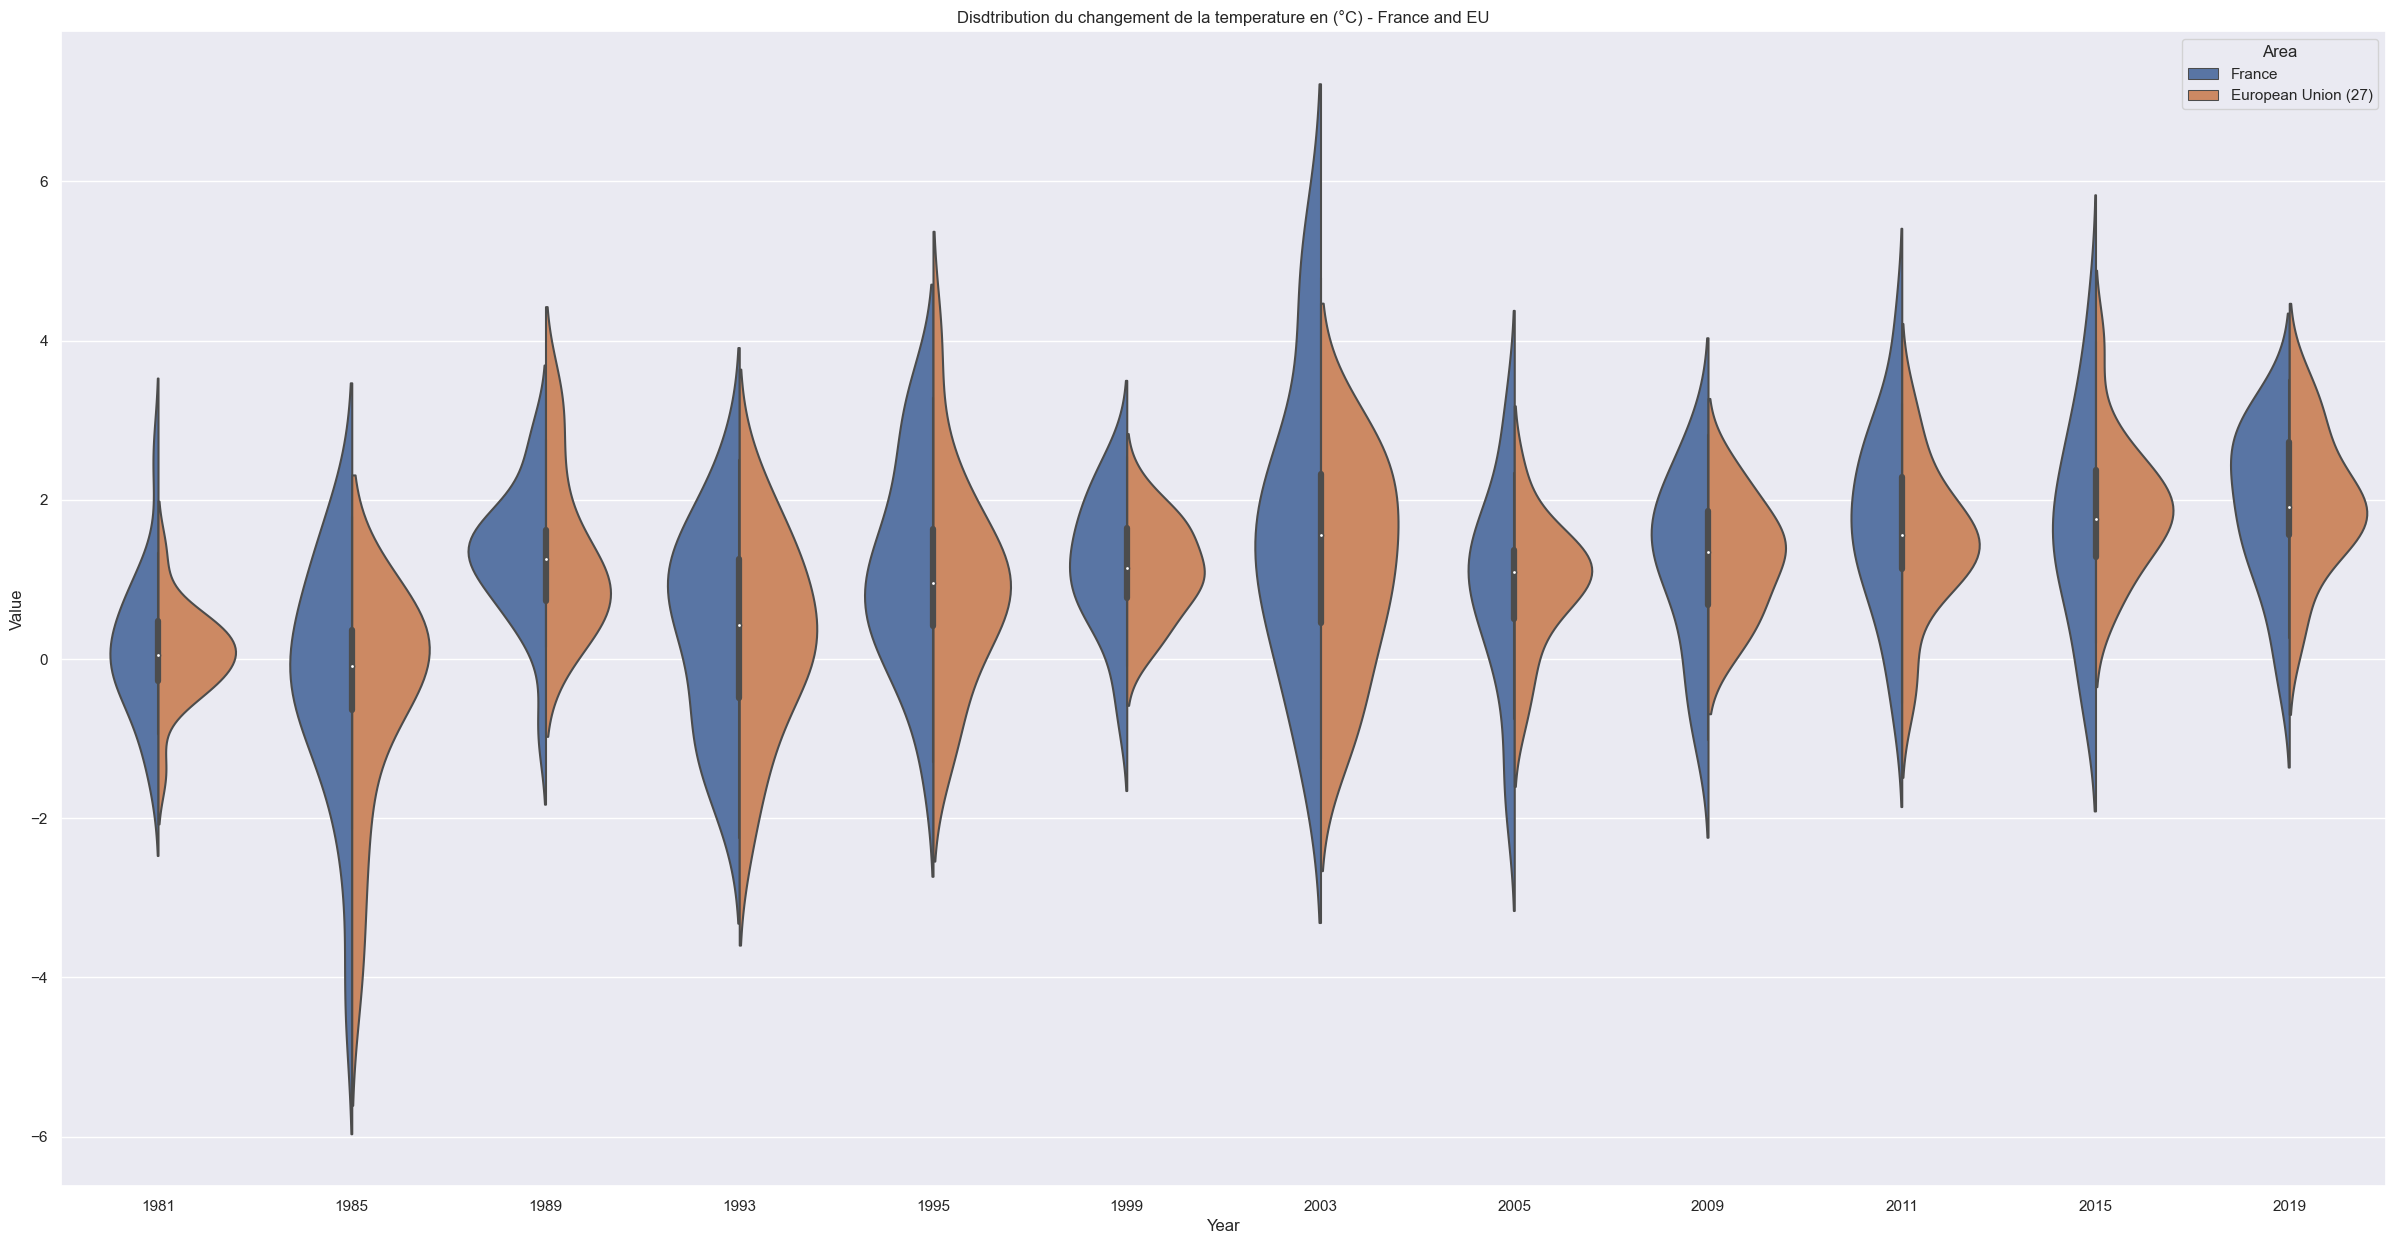

In [93]:
#Visualisation en violionplot
sb.set(rc={'figure.figsize':(30,15)})

sb.violinplot(x='Year', # variable x-axis
             y='Value',  # variable y-axis
             data=df_1_years[(df_1_years["Area"]!='World')],
             split = True,
             hue = 'Area',
             ).set(title = "Disdtribution du changement de la temperature en (°C) - France and EU")

plt.show()

# 2) AUGMENTATION DE LA TEMPERATURE MOYENNE EN FRANCE

## REPRESANTATION CARTOGRAPHIQUE
### https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/information/?sort=date&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ0bjEyYyIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGF0ZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6ImRheSIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImRvbm5lZXMtc3lub3AtZXNzZW50aWVsbGVzLW9tbSIsIm9wdGlvbnMiOnsic29ydCI6ImRhdGUifX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=2,-15.59255,6.58223&basemap=jawg.light

In [138]:
#dataframe geojson des regions
df_france_geo_regions.head(3)

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."


In [ ]:
#Garder le colonne souhatees
df_2_filtred = df_2[["Date",
            'Température (°C)',
           'communes (name)',
           'region (name)',
           'department (name)',
           'Latitude',
           'Longitude']]

#Modification de la colonne 'Date' par un regex
#T02:00
#T01:00
df_2_filtred['Date'] = df_2_filtred['Date'].str.replace('T',' ')
df_2_filtred['Date'] = df_2_filtred['Date'].str.replace('\+[0-9]+:[0-9]+',' ')

#Transformer la colonne 'Date' en formate Date
df_2_filtred['Date']= pd.to_datetime(df_2_filtred['Date'])

In [139]:
## Traitement des donees nules
df_2_filtred = df_2_filtred.dropna()
print(df_2_filtred.isnull().sum())


Date                 0
Température (°C)     0
communes (name)      0
region (name)        0
department (name)    0
Latitude             0
Longitude            0
dtype: int64


In [140]:
#Rejoindre le fichier geojson avec la dataframe
merged_inner_geo_france = pd.merge(left=df_france_geo_regions, right=df_2_filtred, left_on='nom', right_on='region (name)')
merged_inner_geo_france['year'] = merged_inner_geo_france.Date.dt.year

merged_inner_geo_france.head(3)

,code,nom,geometry,Date,Température (°C),communes (name),region (name),department (name),Latitude,Longitude,year
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",2010-01-05 16:00:00,-0.5,Athis-Mons,Île-de-France,Essonne,48.716833,2.384333,2010
1,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",2010-01-06 01:00:00,-4.4,Athis-Mons,Île-de-France,Essonne,48.716833,2.384333,2010
2,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",2010-01-05 01:00:00,-5.6,Athis-Mons,Île-de-France,Essonne,48.716833,2.384333,2010


In [141]:
#Regrouper les moyennes pour chaque region: annee 2010
merged_inner_geo_france_2010 = merged_inner_geo_france[(merged_inner_geo_france["year"] == 2010)].groupby(
    ["nom"]).mean() 

In [99]:
#Regrouper les moyennes pour chaque region: annee 2022
merged_inner_geo_france_2021 = merged_inner_geo_france[(merged_inner_geo_france["year"] == 2021)].groupby(
    ["nom"]).mean() 

In [143]:
#Rejoindre le fichier geojson avec la dataframe ???
merged_inner_geo_mean_temp_2010 = pd.merge(
    left=df_france_geo_regions, 
    right=merged_inner_geo_france_2010, 
    left_on='nom', 
    right_on='nom')

merged_inner_geo_mean_temp_2010.head(3)

,code,nom,geometry,Température (°C),Latitude,Longitude,year
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",10.714045,48.716833,2.384333,2010.0
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...",10.965458,47.250569,1.548940,2010.0
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...",10.008969,47.267833,5.088333,2010.0


In [144]:
#Rejoindre le fichier geojson avec la dataframe
merged_inner_geo_mean_temp_2021 = pd.merge(
    left=df_france_geo_regions, 
    right=merged_inner_geo_france_2021, 
    left_on='nom', 
    right_on='nom')

merged_inner_geo_mean_temp_2021.head(3)

,code,nom,geometry,Température (°C),Latitude,Longitude,year
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",12.005729,48.716833,2.384333,2021.0
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...",11.936013,47.251767,1.543863,2021.0
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...",11.030992,47.267833,5.088333,2021.0


[Text(0.5, 1.0, 'Temperature moyenne en France - 2022')]

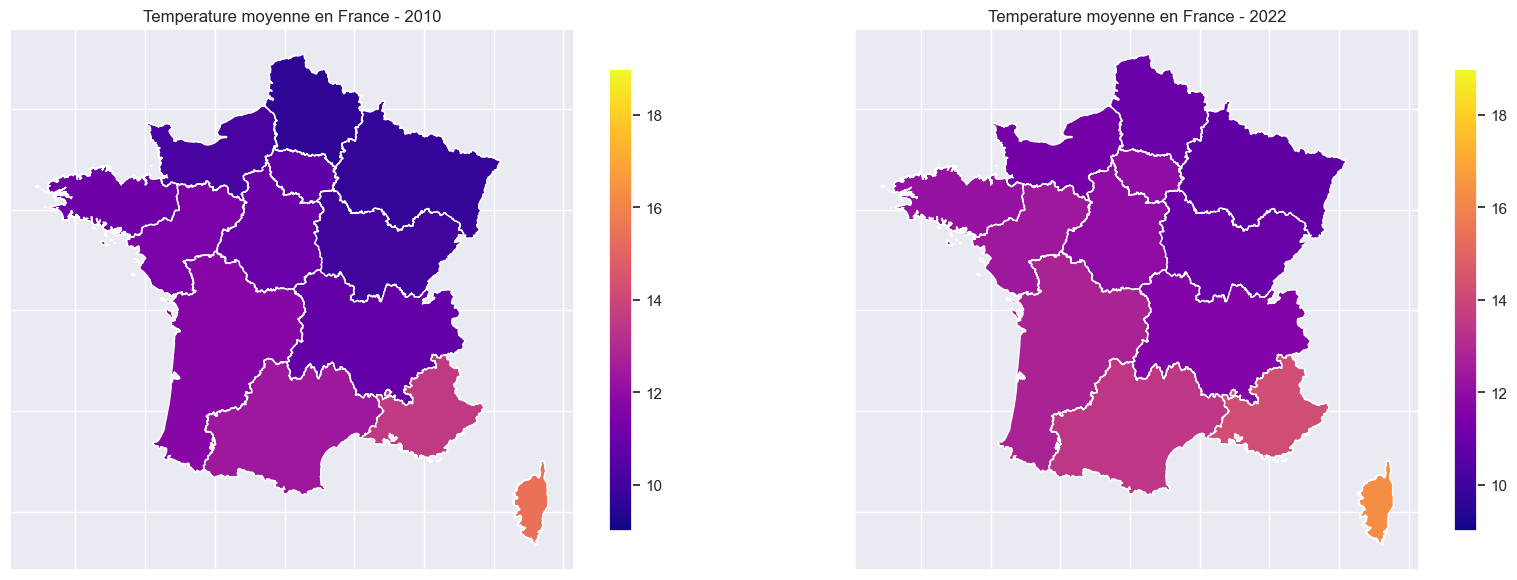

In [102]:
#Creation de 2 subplots
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 20))

#Enlever les valeurs sur les axes pour les 2 subplots
ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2.set_yticklabels([])
ax2.set_xticklabels([])

#min et max pour la barre 
norm = plt.Normalize(vmin=9, vmax=19)

#plot de 2010
merged_inner_geo_mean_temp_2010.plot(column = 'Température (°C)', # colonne 
                ax=ax1, # function axes
                cmap = 'plasma', # couleur de la barre 
                legend = True, 
                legend_kwds={'shrink': 0.3},norm = norm).set(title = "Temperature moyenne en France - 2010") 

#plot de 2022
merged_inner_geo_mean_temp_2021.plot(column = 'Température (°C)', 
                ax=ax2, 
                cmap = 'plasma', 
                legend = True, 
                legend_kwds={'shrink': 0.3}, norm =norm).set(title = "Temperature moyenne en France - 2021") 

# 3) CORRELATION AVEC LE CO2
## CORRELATION ENTRE LE CHANGEMENT DE LA TEMPERATURE ET L'EMISISON DU CO2
### https://ourworldindata.org/co2/country/france?country=FRA~OWID_WRL

In [130]:
##CO2 Emissions
df_3.head(3)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0


In [131]:
#Emission mondiale
df_3_world = df_3[(df_3["Entity"] == "World")]

#Pour la temperature on utilise la premiere dataframe
df_a_years_meteorological_years_world  = df_1[(df_1["Months"] == "Meteorological year") & (df_1["Area"] == "World")]

df_a_years_meteorological_years_world.head(3)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
2013,ET,Temperature change,1,World,7271,Temperature change,7020,Meteorological year,1961,1961,°C,0.207,E,Estimated value
2014,ET,Temperature change,1,World,7271,Temperature change,7020,Meteorological year,1962,1962,°C,0.037,E,Estimated value
2015,ET,Temperature change,1,World,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.167,E,Estimated value


In [111]:
#Tout est ok
print(df_3_world .isnull().sum())

Entity                  0
Code                    0
Year                    0
Annual CO₂ emissions    0
dtype: int64


In [115]:
#fusionner les 2 dataframe sans perdre les valeurs
df_merged_world = pd.merge(left = df_3_world,
                    right =  df_a_years_meteorological_years_world,
                    left_on = 'Year' ,
                    right_on = 'Year')
df_merged_world.rename(columns={"Value":'Temperature change °C', "Annual CO₂ emissions": "Annual CO2 emissions"},inplace = True)

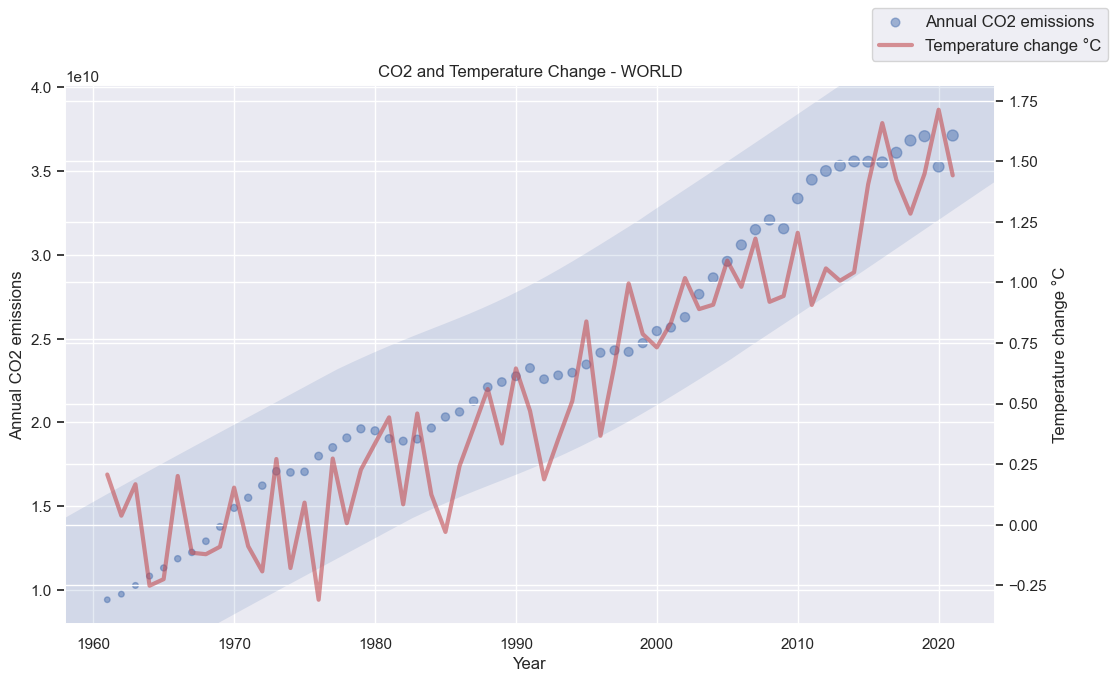

In [117]:
p = plt.figure(figsize=(12,7))

#Premier plot 
ax = sb.regplot(data=df_merged_world, x='Year', y="Annual CO2 emissions", fit_reg=True, lowess=True, scatter_kws={'s': df_merged_world['Annual CO2 emissions']/600000000, 'alpha':0.5},label="Annual CO2 emissions", line_kws={'lw':120, 'alpha':0.15}) # on divise l'emission par 600000000 pour la taille des points

#fusionner les 2 plots
ax2 = ax.twinx()

#Deuxieme plot
df_merged_world.plot(x="Year", y="Temperature change °C", ylabel="Temperature change °C", ax=ax2, linewidth=3, alpha = 0.6, legend=False, color="r").set(title = "CO2 and Temperature Change - WORLD")
ax.figure.legend(fontsize="medium")

plt.show()

# 4) ANALYSE DE LA CONSOMMATION D'ÉNERGIE RENOUVELABLES ANNUELLES (EN %)
## Consommations d'énergies renouvelables annuelles (en %)
### https://ourworldindata.org/renewable-energy

In [132]:
#La colonne 'Renewables per capita (kWh - equivalent)' est en effet en MWh
#On devra multiplier la colonne par 1000 pour avoir des valeurs en kWh
df_a.head(3)

,Entity,Code,Year,Renewables per capita (kWh - equivalent)
0,Africa,NaN,1965,0.128437
1,Africa,NaN,1966,0.139717
2,Africa,NaN,1967,0.142220


In [123]:
#Les pays souhaitées
top_renew_country = ['China','United States',
                     'Brazil','Canada','India','Germany',
                     'Russia','Japan','Norway','Italy']

#La fonction pour garder les donnees de 2010 jusqu'a 2021 
def country_df(df):
    dfn = df[(df.Year >= 2010) & (df.Year < 2021)]
    dfn = dfn[dfn.Entity.isin(top_renew_country)]
    dfn.reset_index(drop=True, inplace=True)
    dfn.dropna()
    return dfn

In [134]:
renewables = country_df(df_a)
hydro = country_df(df_b)
solar = country_df(df_c)
wind = country_df(df_d)

#fusionnement des 4 dataframes
result = renewables.merge(hydro,on=['Entity', 'Code', 'Year']).merge(solar,on=['Entity', 'Code', 'Year']).merge(wind,on=['Entity', 'Code', 'Year'])

result.head(3)

,Entity,Code,Year,Renewables per capita (kWh - equivalent),Hydro per capita (kWh - equivalent),Solar per capita (kWh - equivalent),Wind per capita (kWh - equivalent)
0,Brazil,BRA,2010,7.085883,5719.390137,0.000000,30.867586
1,Brazil,BRA,2011,7.284781,5982.458496,0.000000,37.777081
2,Brazil,BRA,2012,7.048717,5714.571289,0.013479,69.481461


In [135]:
r_pct = {'hydro_pct':'Hydro per capita (kWh - equivalent)',\
         'solar_pct':'Solar per capita (kWh - equivalent)',\
         'wind_pct':'Wind per capita (kWh - equivalent)'}


#ajoute les colonnes des pourcentages de consommation 
for pct, cons in r_pct.items():
  result[pct] = result[cons]/(result['Renewables per capita (kWh - equivalent)']*1000)*100     #MWH en kWH 

result.head(3)

,Entity,Code,Year,Renewables per capita (kWh - equivalent),Hydro per capita (kWh - equivalent),Solar per capita (kWh - equivalent),Wind per capita (kWh - equivalent),hydro_pct,solar_pct,wind_pct
0,Brazil,BRA,2010,7.085883,5719.390137,0.000000,30.867586,80.715274,0.000000,0.435621
1,Brazil,BRA,2011,7.284781,5982.458496,0.000000,37.777081,82.122692,0.000000,0.518575
2,Brazil,BRA,2012,7.048717,5714.571289,0.013479,69.481461,81.072500,0.000191,0.985732


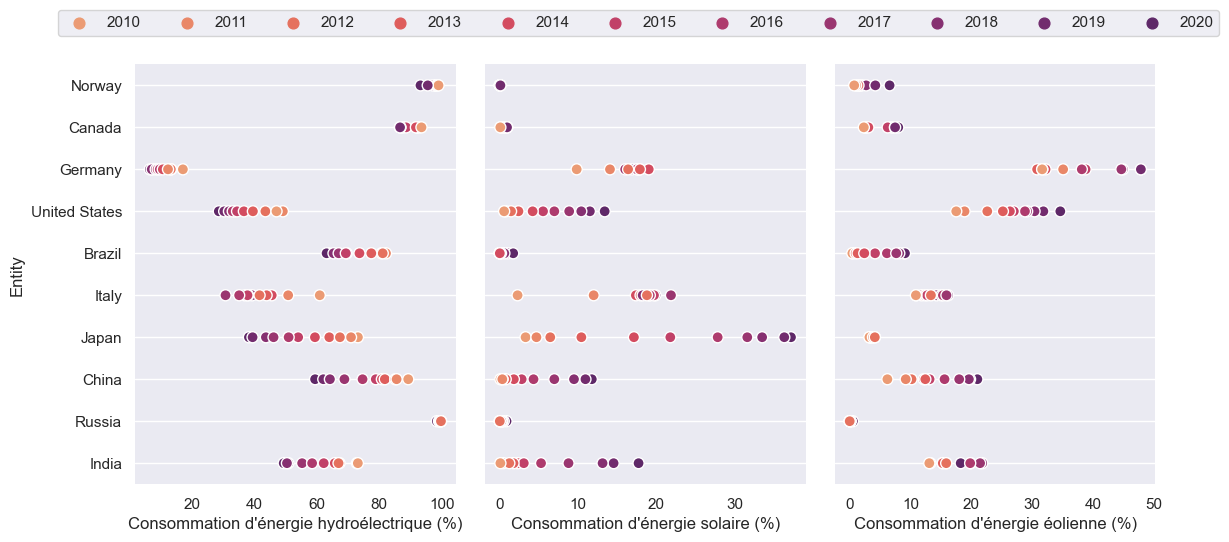

In [136]:
#Le plot de consommation d'energie renouvables
g = sb.PairGrid(result.sort_values("Renewables per capita (kWh - equivalent)", ascending=False),\
                 x_vars=['hydro_pct','solar_pct','wind_pct'],\
                 y_vars=['Entity'], height=5, aspect=0.75, hue='Year')

#Ajoutté des stripplot
g.map(sb.stripplot, size=8, orient="h", jitter=False,
      palette="flare", linewidth=1, edgecolor="w")
g.set(ylabel='Entity')
plt.legend(loc='lower left',bbox_to_anchor=(-2.45,1.05), ncol=11)
sb.despine(left=True, bottom=True)

x_axis = ["Consommation d'énergie hydroélectrique (%)", "Consommation d'énergie solaire (%)", "Consommation d'énergie éolienne (%)"]
for ax, x_axis in zip(g.axes.flat, x_axis):
    ax.set(xlabel=x_axis)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

plt.show()
